In [271]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [272]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [273]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(filepath, names=headers)    # Utilize the same header list defined above

In [274]:
df.replace('?',np.nan, inplace=True)


In [275]:
print(df.isnull().sum())



symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [277]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool


In [278]:
average_loss= df["normalized-losses"].astype(float).mean(axis=0)

In [279]:
df["normalized-losses"].replace(np.nan,average_loss,inplace=True)   #using replace
df.head(5)

C:\Users\omare\AppData\Local\Temp\ipykernel_31964\2880118077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace(np.nan,average_loss,inplace=True)   #using replace


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [280]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df.fillna({'peak-rpm':avg_peakrpm},inplace = True)      #using fillna 

In [281]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [282]:
most_freq_door=df['num-of-doors'].value_counts().idxmax()
print(most_freq_door)
df["num-of-doors"].replace(np.nan , most_freq_door,inplace=True)

four


C:\Users\omare\AppData\Local\Temp\ipykernel_31964\2813606191.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["num-of-doors"].replace(np.nan , most_freq_door,inplace=True)


In [283]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)


Average horsepower: 104.25615763546799


In [284]:
df['horsepower']=df['horsepower'].replace(np.nan, avg_horsepower)
#df['horsepower'].fillna(avg_horsepower, inplace=True)

In [285]:
df.dropna(subset=["price"],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)


In [286]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df[["horsepower"]] = df[["horsepower"]].astype("float")

In [287]:
df['city-L/100km'] = 235/df["city-mpg"]
# data transformation

In [288]:
# replace (original value) by (original value)/(maximum value) normalization
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [289]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [290]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [291]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [292]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [293]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,False,True


In [294]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
fuel-type-diesel        bool
fuel-type-gas           bool
dtype: object

In [295]:
df[["fuel-type-gas","fuel-type-diesel"]] = df[["fuel-type-gas","fuel-type-diesel"]].astype("int")

In [296]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


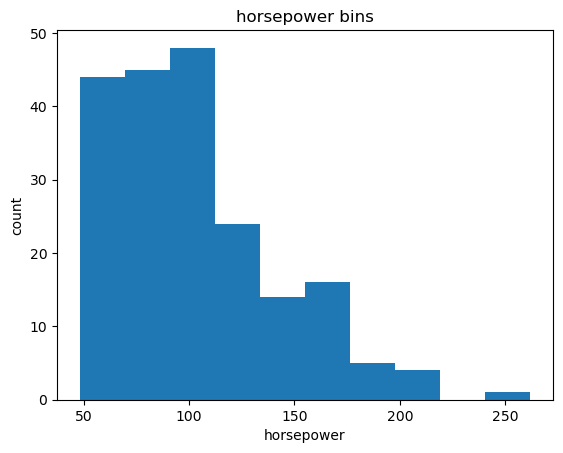

In [297]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
plt.pyplot.show()


In [298]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [299]:
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


In [300]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

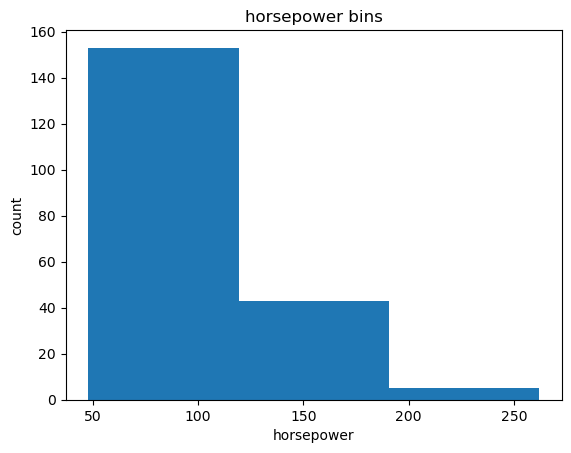

In [301]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
plt.pyplot.show()

In [302]:
grouped_test1=df.groupby(['aspiration', 'drive-wheels'])['price'].mean()

In [303]:
grouped_pivot = grouped_test1.reset_index().pivot(index='aspiration', columns='drive-wheels')
print(grouped_pivot)  #better to ensure they are dataframe before grouping so we wont need to.frame

                     price                            
drive-wheels           4wd           fwd           rwd
aspiration                                            
std            9829.166667   8724.029412  19660.245614
turbo         11476.500000  12564.562500  20065.944444


In [304]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


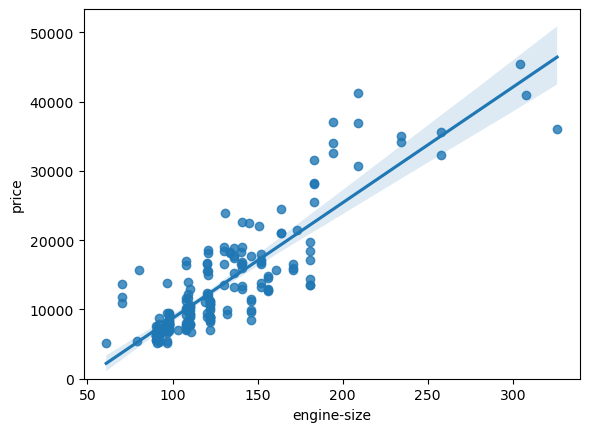

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.show()

In [306]:
from scipy import stats
import numpy as np

# Only iterate through numeric columns for correlation with price
for param in df.select_dtypes(include=[np.number]).columns:
    # Skip if the column is 'price' itself
    if param != 'price':
        pearson_coef, p_value = stats.pearsonr(df[param], df['price'])
        print(param)
        print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, "with a P-value of P =", p_value)

symboling
The Pearson Correlation Coefficient for symboling is -0.08239118716962357 with a P-value of P = 0.24491487657164715
normalized-losses
The Pearson Correlation Coefficient for normalized-losses is 0.1339987342927434 with a P-value of P = 0.05789749352703129
wheel-base
The Pearson Correlation Coefficient for wheel-base is 0.5846418222655081 with a P-value of P = 8.076488270732885e-20
length
The Pearson Correlation Coefficient for length is 0.6906283804483642 with a P-value of P = 8.016477466158868e-30
width
The Pearson Correlation Coefficient for width is 0.7512653440522673 with a P-value of P = 9.20033551048206e-38
height
The Pearson Correlation Coefficient for height is 0.1354863075680597 with a P-value of P = 0.05514627325101255
curb-weight
The Pearson Correlation Coefficient for curb-weight is 0.8344145257702845 with a P-value of P = 2.189577238893965e-53
engine-size
The Pearson Correlation Coefficient for engine-size is 0.8723351674455185 with a P-value of P = 9.26549162219

In [307]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)


LinearRegression()

In [308]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [309]:
lm.intercept_


np.float64(38423.305858157386)

In [310]:
lm.coef_  #Price = 38423.31 - 821.73 x highway-mpg

array([-821.73337832])

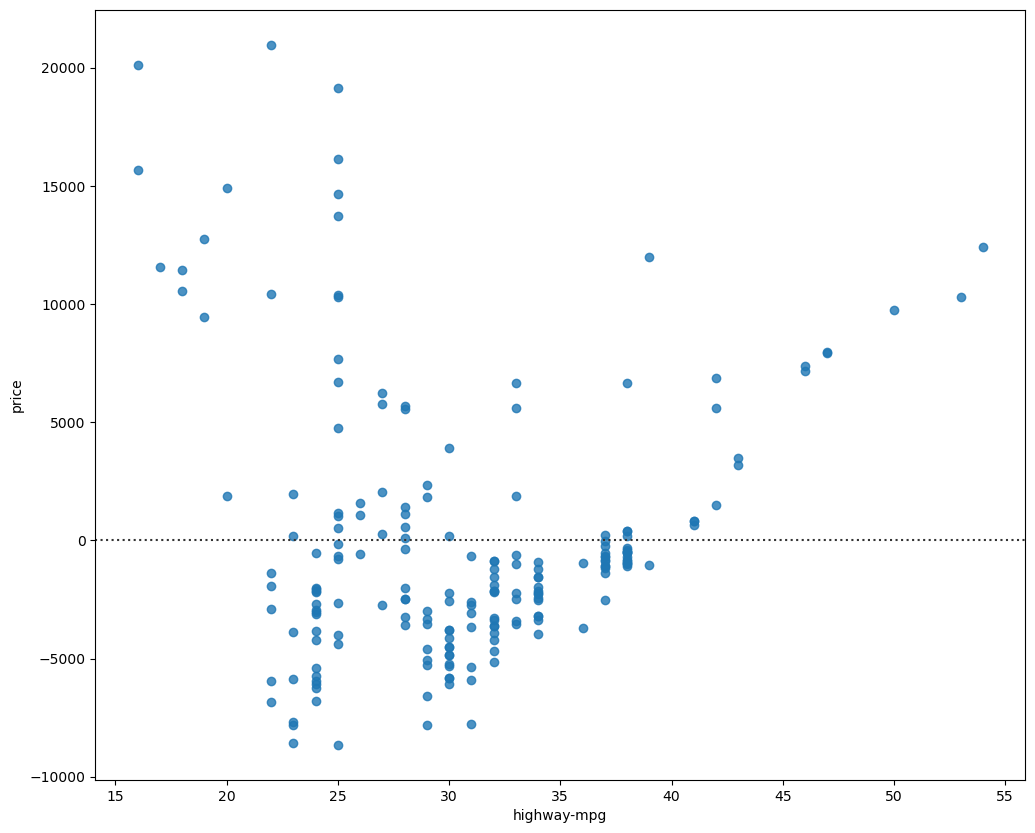

In [311]:
# resid_plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()
# not good bc not randomly spread around the x axis try to use non-linear

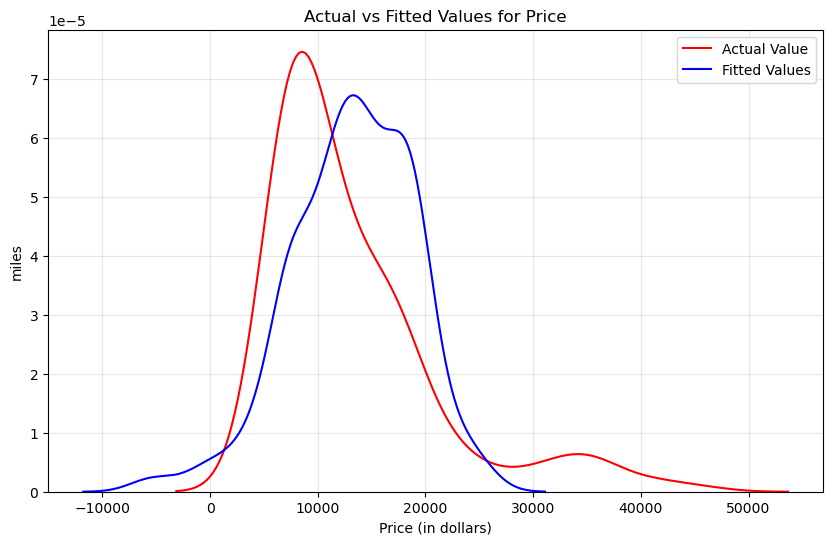

In [312]:
# Assistant
import matplotlib.pyplot as plt
import seaborn as sns

# Create a simple distribution plot comparing actual and predicted prices
plt.figure(figsize=(10,6))

# Plot the distributions
# Removed 'hist' parameter which is no longer supported in newer seaborn versions
ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Yhat, color="b", label="Fitted Values", ax=ax1)

# Add labels and title
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('miles')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

            8            7          6         5         4             3
-9.519e-06 x + 0.002642 x - 0.3139 x + 20.82 x - 841.1 x + 2.117e+04 x
              2
 - 3.235e+05 x + 2.735e+06 x - 9.728e+06


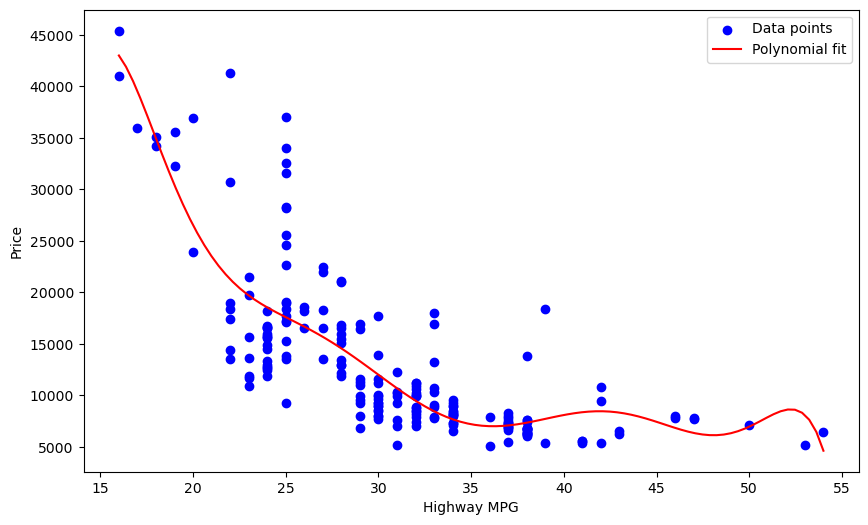

In [313]:
# First, we need to define the PlotPolly function
def PlotPolly(model, x_data, y_data, x_label, y_label='Price'):
    """
    Plots a polynomial regression model
    
    Parameters:
    model: The polynomial model
    x_data: Input features
    y_data: Target values
    x_label: Label for x-axis
    y_label: Label for y-axis (default is 'Price')
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    x_new = np.linspace(min(x_data), max(x_data), 100)
    y_new = model(x_new)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, color='blue', label='Data points')
    plt.plot(x_new, y_new, color='red', label='Polynomial fit')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Now use the function with your data
x = df['highway-mpg']
y = df['price']
f1 = np.polyfit(x, y, 8)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'Highway MPG')  # Now this function is defined

In [314]:
#split into training and testing sets
y_data = df['price']
x_data=df.drop('price',axis=1)

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=1)
#test_size shows that we take 10% of the data for testing

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 81
number of training samples: 120


In [315]:
# building linear reg model for predection
from sklearn.linear_model import LinearRegression
lre=LinearRegression()


In [316]:
lre.fit(x_train[['highway-mpg']], y_train)
# lre.fit(x_train, y_train) if i wanted to use all the features not only highway

LinearRegression()

In [317]:
lre.score(x_test[['highway-mpg']], y_test)    
# R square , model explains 43% of variance in predectied data

0.4322565950970264

In [318]:
lre.score(x_train[['highway-mpg']], y_train)

0.5161140816536041

In [319]:
from sklearn.model_selection import cross_val_score


In [320]:
Rcross = cross_val_score(lre, x_data[['highway-mpg']], y_data, cv=4)
# cross validation with 4 folds of data


In [321]:
Rcross


array([0.56273923, 0.50617506, 0.36024954, 0.123501  ])

In [322]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.3881662072564622 and the standard deviation is 0.1697268682335954


In [323]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])